In [10]:
# Install Libraries
#!pip install textblob
#!pip install tweepy
#!pip install textblob
#!pip install matplotlib.pyplot
#!pip install nltk
#!pip install pandas
#!pip install numpy
#!pip install pycountry
#!pip install scikit-learn
#!pip install langdetect
#!pip install sklearn
#!nltk.download('vader_lexicon')
#!nltk.download('stopwords')

In [1]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#you need to have an twitter developer account to get these keys link developer.twitter.com
# Authentication
consumerKey = "enter consumer key"
consumerSecret = "enter consumersecret key"
accessToken = "enter the access token key"
accessTokenSecret = "enter accesstokensecret key"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: #INDvsENG
Please enter how many tweets to analyze: 2500


In [4]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2500
positive number:  1019
negative number:  162
neutral number:  1319


In [5]:
tweet_list

,0
0,@redcliffelab Dinesh Karthik \n\n#giveaway #co...
1,RT @shubhankrmishra: Pakistan beat NZ| Now in ...
2,RT @thesportsbash: 🚨 JUST IN 🚨\n\nMark Wood &a...
3,I hope India’s “great” openers #KLRahul and #R...
4,RT @ViratGang: Virat Kohli's Net Practice Ahea...
...,...
2495,RT @AshutosSharma25: Kane Williamson being tak...
2496,RT @cheatingacademy: CHEATING:\n\nWell payed C...
2497,RT @samiminhas61: Congratulations Pakistan\n ...
2498,"RT @Master__Cricket: AB De Villiers said,""Indi..."


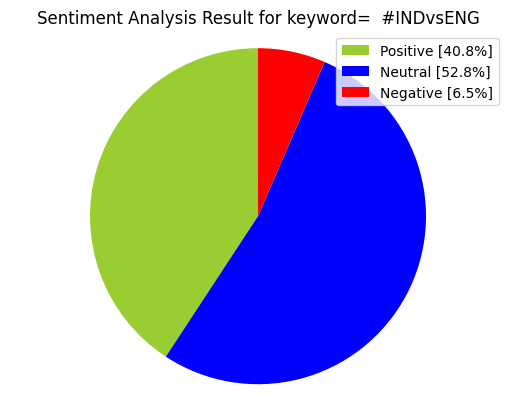

In [6]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [7]:
tweet_list.drop_duplicates(inplace = True)

#Extracting text values
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

In [36]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @doteonunew: นูนู่หัวกลม+เอฟเฟคหัวโตแก้มแดง...,RT @doteonunew: นูนู่หัวกลม+เอฟเฟคหัวโตแก้มแดง...
1,RT @minixciii: ดูอินเนอร์โจรซะก่อนนนน โจรขโมยป...,RT @minixciii: ดูอินเนอร์โจรซะก่อนนนน โจรขโมยป...
2,RT @yuzuh27: I'd melt if I was that guy. 😭\n\n...,RT @yuzuh27: I'd melt if I was that guy. 😭\n\n...
3,RT @TeamSupportNNew: ชอบกินทุกอย่างเลยครับ ไม่...,RT @TeamSupportNNew: ชอบกินทุกอย่างเลยครับ ไม่...
4,RT @AfternoonZeeNew: 😽 ยอดวิวเพิ่มขึ้นเรื่อยๆก...,RT @AfternoonZeeNew: 😽 ยอดวิวเพิ่มขึ้นเรื่อยๆก...
...,...,...
2448,มีลงในยูทูปแล้วน้า~ ไปฟังเต็มๆกัน\n\n🔗https://...,มีลงในยูทูปแล้วน้า~ ไปฟังเต็มๆกัน\n\n🔗https://...
2451,RT @Minii_ZN: น้องตกใจจจจจ😂😂😂\n#SoundCheckxNuN...,RT @Minii_ZN: น้องตกใจจจจจ😂😂😂\n#SoundCheckxNuN...
2463,RT @Naleen_N: ตอนนี้เกรดยังไม่หลุดครับ //ขอให้...,RT @Naleen_N: ตอนนี้เกรดยังไม่หลุดครับ //ขอให้...
2494,RT @BeBeMyLove3: #SoundCheckxNuNew🎉ปังสุดๆ #Nu...,RT @BeBeMyLove3: #SoundCheckxNuNew🎉ปังสุดๆ #Nu...


In [37]:
tweet_list

,0,text
0,RT @doteonunew: นูนู่หัวกลม+เอฟเฟคหัวโตแก้มแดง...,RT @doteonunew: นูนู่หัวกลม+เอฟเฟคหัวโตแก้มแดง...
1,RT @minixciii: ดูอินเนอร์โจรซะก่อนนนน โจรขโมยป...,RT @minixciii: ดูอินเนอร์โจรซะก่อนนนน โจรขโมยป...
2,RT @yuzuh27: I'd melt if I was that guy. 😭\n\n...,RT @yuzuh27: I'd melt if I was that guy. 😭\n\n...
3,RT @TeamSupportNNew: ชอบกินทุกอย่างเลยครับ ไม่...,RT @TeamSupportNNew: ชอบกินทุกอย่างเลยครับ ไม่...
4,RT @AfternoonZeeNew: 😽 ยอดวิวเพิ่มขึ้นเรื่อยๆก...,RT @AfternoonZeeNew: 😽 ยอดวิวเพิ่มขึ้นเรื่อยๆก...
...,...,...
2448,มีลงในยูทูปแล้วน้า~ ไปฟังเต็มๆกัน\n\n🔗https://...,มีลงในยูทูปแล้วน้า~ ไปฟังเต็มๆกัน\n\n🔗https://...
2451,RT @Minii_ZN: น้องตกใจจจจจ😂😂😂\n#SoundCheckxNuN...,RT @Minii_ZN: น้องตกใจจจจจ😂😂😂\n#SoundCheckxNuN...
2463,RT @Naleen_N: ตอนนี้เกรดยังไม่หลุดครับ //ขอให้...,RT @Naleen_N: ตอนนี้เกรดยังไม่หลุดครับ //ขอให้...
2494,RT @BeBeMyLove3: #SoundCheckxNuNew🎉ปังสุดๆ #Nu...,RT @BeBeMyLove3: #SoundCheckxNuNew🎉ปังสุดๆ #Nu...


In [38]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @doteonunew: นูนู่หัวกลม+เอฟเฟคหัวโตแก้มแดง...,...
1,RT @minixciii: ดูอินเนอร์โจรซะก่อนนนน โจรขโมยป...,...
2,RT @yuzuh27: I'd melt if I was that guy. 😭\n\n...,i d melt if i was that guy soundcheckxnu...
3,RT @TeamSupportNNew: ชอบกินทุกอย่างเลยครับ ไม่...,...
4,RT @AfternoonZeeNew: 😽 ยอดวิวเพิ่มขึ้นเรื่อยๆก...,...
5,RT @doteonunew: อะไรจะน่าเอ็นดูเท่าตอนนิวเล่าเ...,...
6,RT @Whale1796: ตอนเสียงนุนิวขึ้นคือขนลุกจริง ร...,...
7,RT @mommynunewz: รอดูหนูเอิ้กอ้ากละ &gt;.&lt;\...,gt lt soundcheckxnun...
8,RT @mommynunewz: ช่วยด้วยไม่ไหวแล้วการละครสนุก...,555544445555...
9,RT @MamiewithLitBoy: จู้มู้มาก น่ารักกกกกกก 👼🏻...,soundcheckxnunew


In [39]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

C:\Users\shiva\AppData\Local\Temp\ipykernel_2728\4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @doteonunew: นูนู่หัวกลม+เอฟเฟคหัวโตแก้มแดง...,...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
1,RT @minixciii: ดูอินเนอร์โจรซะก่อนนนน โจรขโมยป...,...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
2,RT @yuzuh27: I'd melt if I was that guy. 😭\n\n...,i d melt if i was that guy soundcheckxnu...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
3,RT @TeamSupportNNew: ชอบกินทุกอย่างเลยครับ ไม่...,...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
4,RT @AfternoonZeeNew: 😽 ยอดวิวเพิ่มขึ้นเรื่อยๆก...,...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
5,RT @doteonunew: อะไรจะน่าเอ็นดูเท่าตอนนิวเล่าเ...,...,0.0,0.0,neutral,0.0,0.000,0.000,0.0000
6,RT @Whale1796: ตอนเสียงนุนิวขึ้นคือขนลุกจริง ร...,...,0.0,0.0,neutral,0.0,0.000,0.000,0.0000
7,RT @mommynunewz: รอดูหนูเอิ้กอ้ากละ &gt;.&lt;\...,gt lt soundcheckxnun...,0.0,0.0,positive,0.0,0.488,0.512,0.2732
8,RT @mommynunewz: ช่วยด้วยไม่ไหวแล้วการละครสนุก...,555544445555...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
9,RT @MamiewithLitBoy: จู้มู้มาก น่ารักกกกกกก 👼🏻...,soundcheckxnunew,0.0,0.0,neutral,0.0,1.000,0.000,0.0000


In [40]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [41]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [42]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,420,86.42
positive,59,12.14
negative,7,1.44


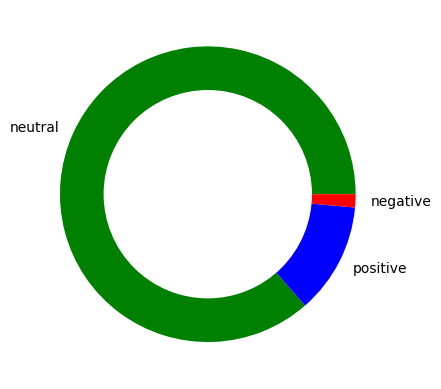

In [45]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [48]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


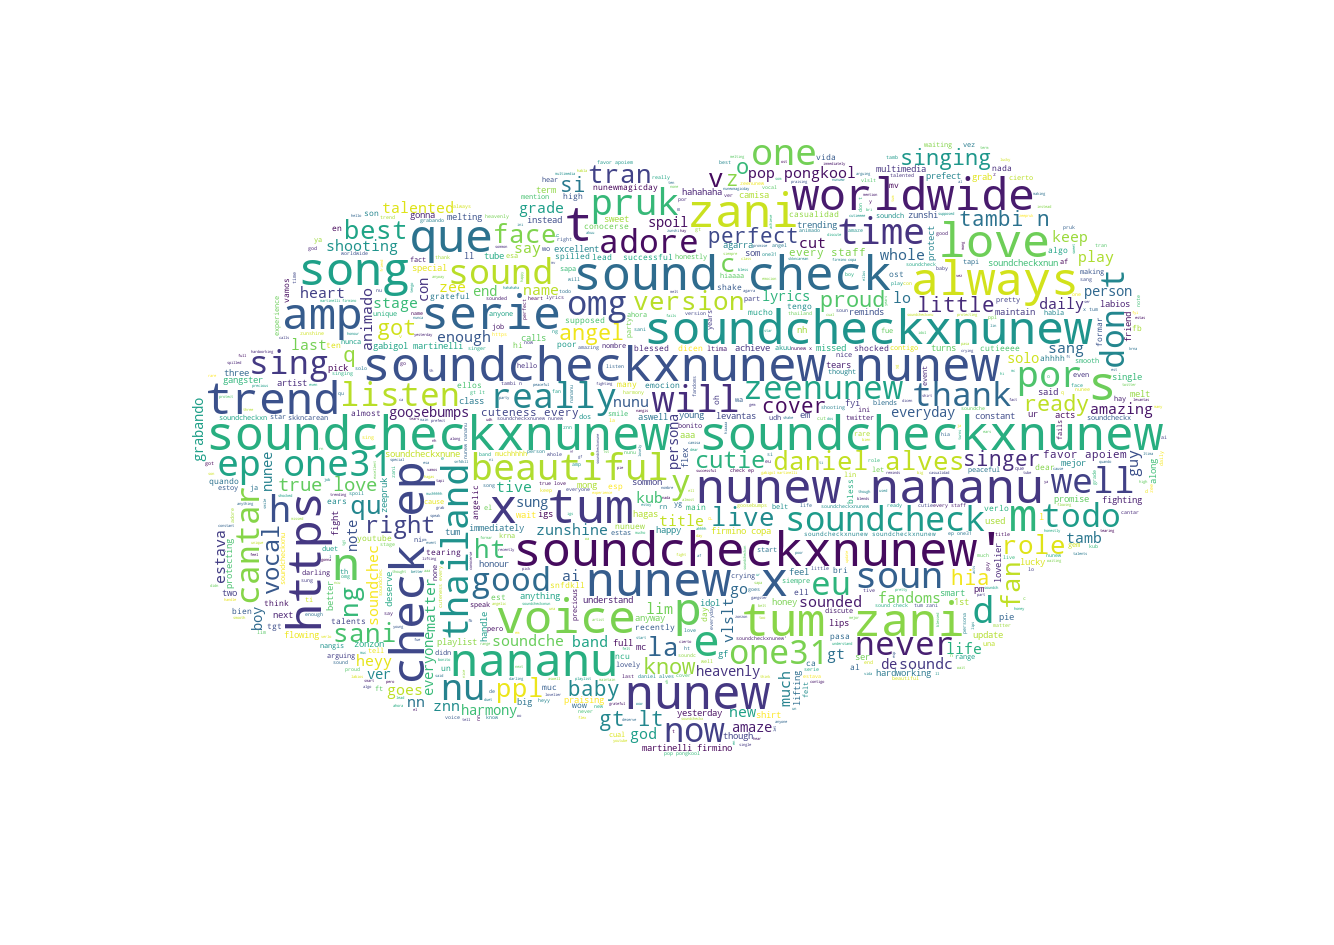

In [49]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


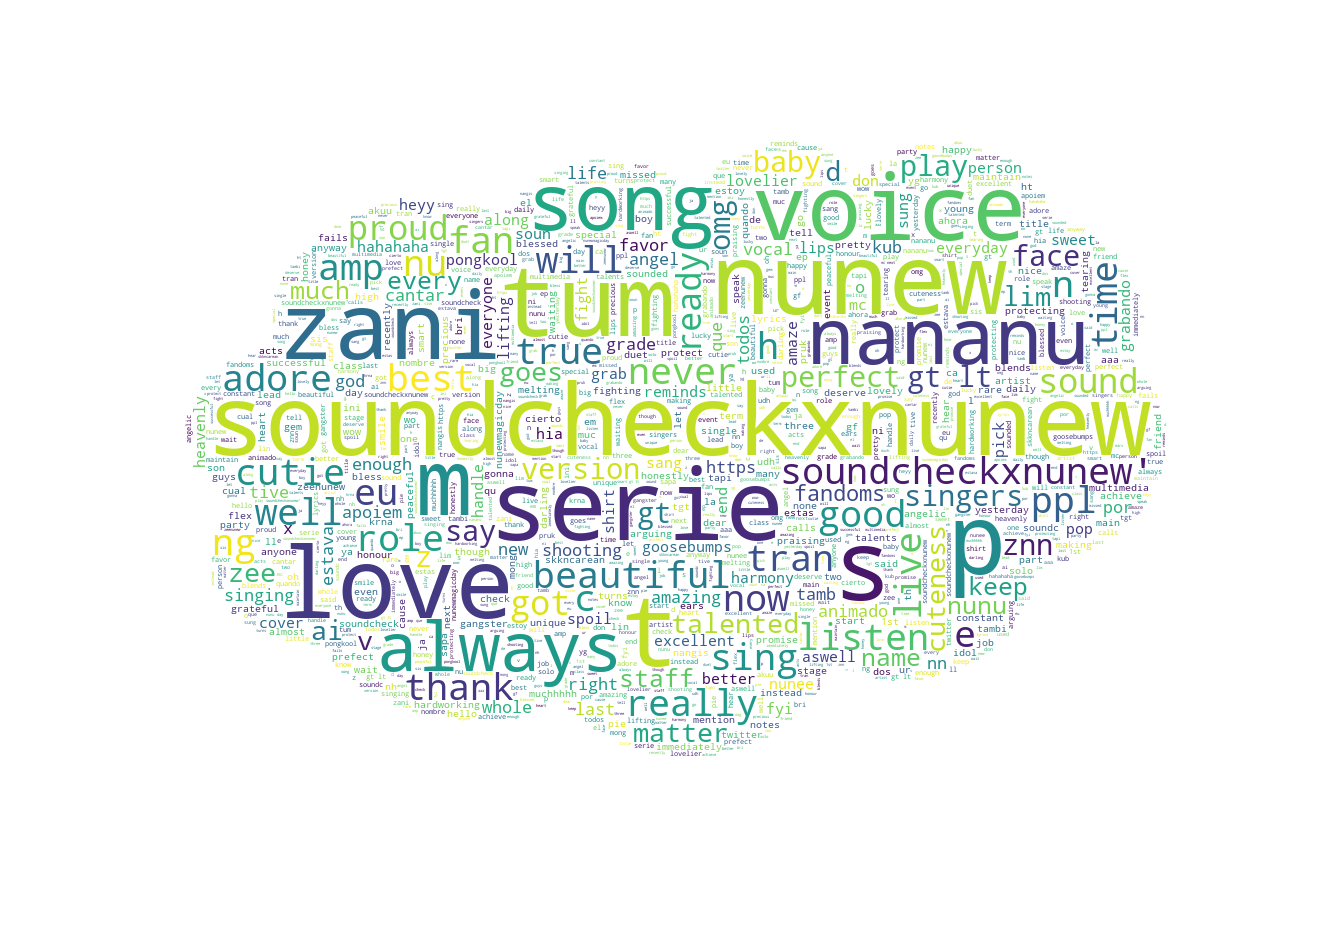

In [50]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


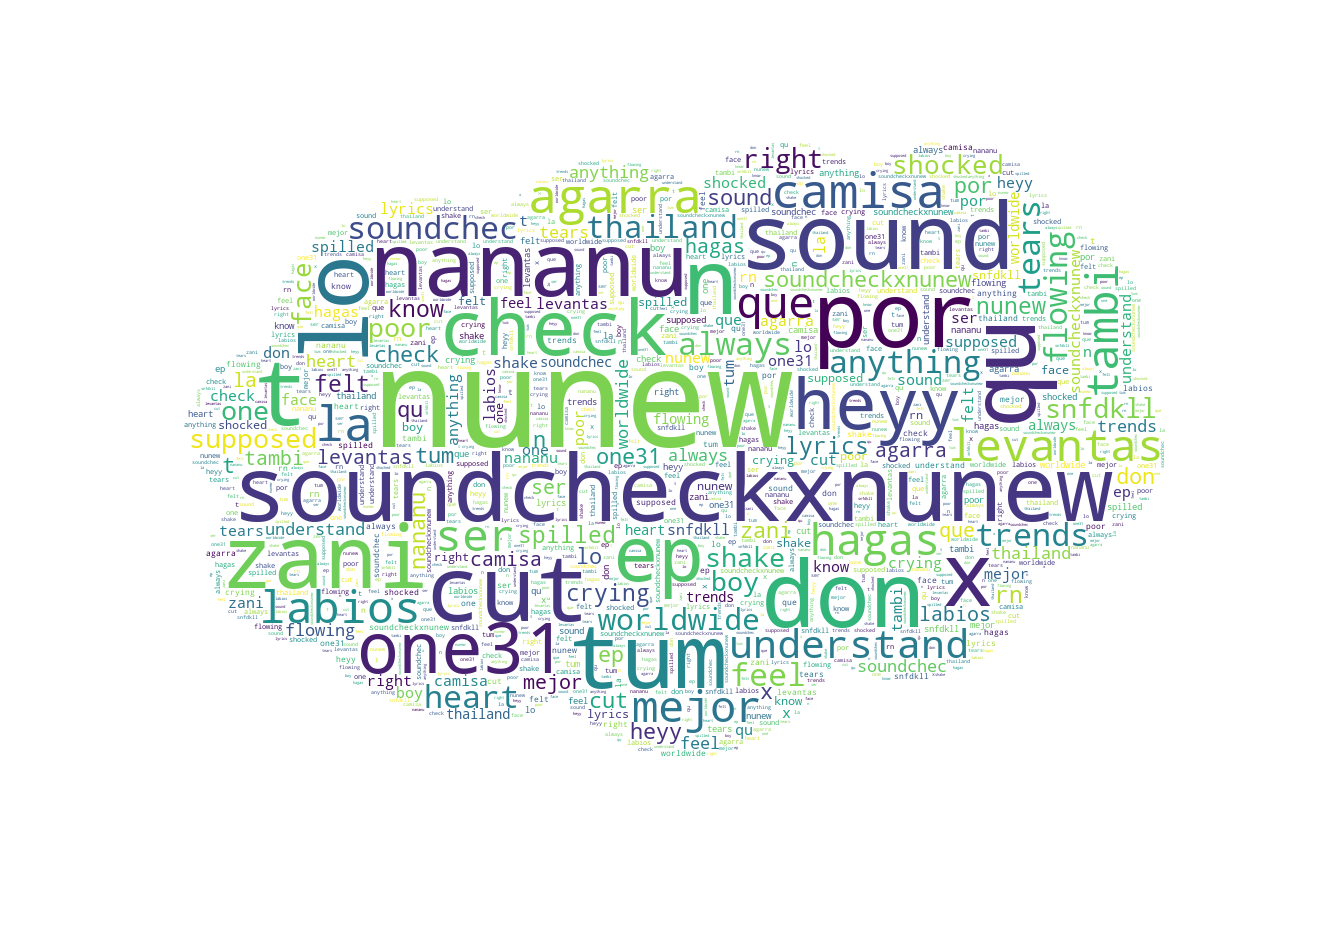

In [52]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


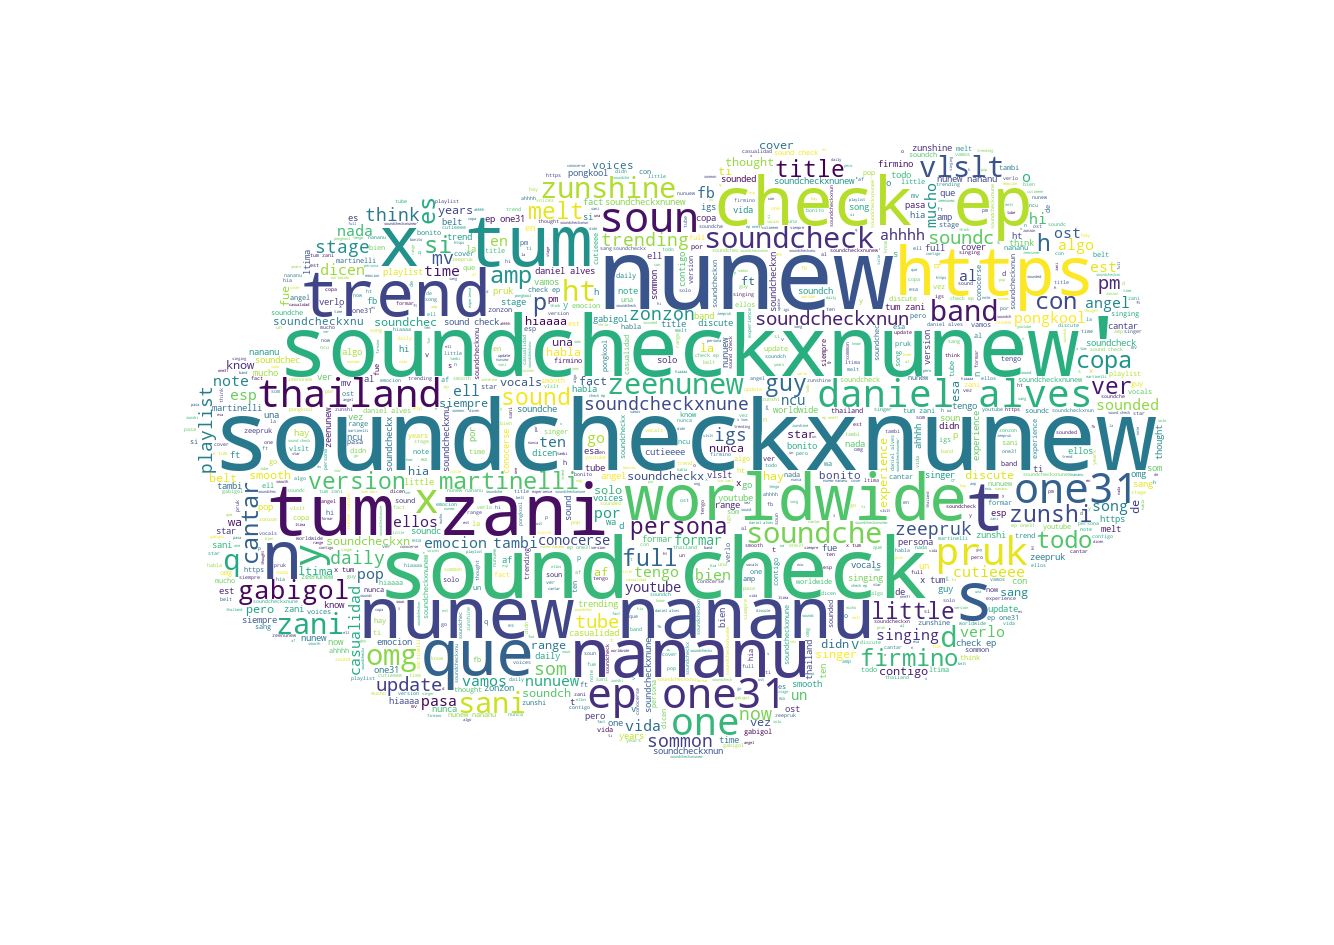

In [53]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [54]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [56]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,104.29
neutral,82.26
positive,97.41


In [57]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,14.00
neutral,2.18
positive,16.29


In [58]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [59]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [61]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [63]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [64]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [65]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @doteonunew: นูนู่หัวกลม+เอฟเฟคหัวโตแก้มแดง...,...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,81,1,...,"[, soundcheckxnunew, ]","[, soundcheckxnunew, ]","[, soundcheckxnunew, ]"
1,RT @minixciii: ดูอินเนอร์โจรซะก่อนนนน โจรขโมยป...,...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,74,2,...,"[, soundcheckxnunew, nunew, ]","[, soundcheckxnunew, nunew, ]","[, soundcheckxnunew, nunew, ]"
2,RT @yuzuh27: I'd melt if I was that guy. 😭\n\n...,i d melt if i was that guy soundcheckxnu...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,51,9,i d melt if i was that guy soundcheckxnu...,"[, i, d, melt, if, i, was, that, guy, soundche...","[, melt, guy, soundcheckxnunew, ]","[, melt, guy, soundcheckxnunew, ]"
3,RT @TeamSupportNNew: ชอบกินทุกอย่างเลยครับ ไม่...,...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,92,3,...,"[, nunew, nananu, soundcheckxnunew, ]","[, nunew, nananu, soundcheckxnunew, ]","[, nunew, nananu, soundcheckxnunew, ]"
4,RT @AfternoonZeeNew: 😽 ยอดวิวเพิ่มขึ้นเรื่อยๆก...,...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,120,2,...,"[, nananu, zunshi, ]","[, nananu, zunshi, ]","[, nananu, zunshi, ]"


In [66]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

486 Number of reviews has 404 words


In [67]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

C:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,aaa,achiev,act,ador,af,agarra,ahhhh,ahora,ai,...,youtub,z,zani,zee,zeenunew,zeepruk,znn,zonzon,zunshi,zunshin
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [68]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
soundcheckxnunew,348
nunew,125
nananu,33
sound,28
tum,25
check,22
zani,21
x,19
one,15
love,11


In [69]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [70]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('nunew soundcheckxnunew', 30),
 ('soundcheckxnunew nunew', 24),
 ('nunew nananu', 24),
 ('sound check', 22),
 ('tum zani', 16),
 ('nunew tum', 13),
 ('nananu soundcheckxnunew', 12),
 ('check ep', 9),
 ('ep 163', 9),
 ('soundcheckxnunew https', 8),
 ('163 65', 7),
 ('one31 soundcheckxnunew', 6),
 ('65 one31', 6),
 ('nunew nunew', 5),
 ('zani sound', 5),
 ('nunew sound', 4),
 ('nananu nunew', 4),
 ('daniel alves', 4),
 ('gt lt', 3),
 ('lt soundcheckxnunew', 3)]

In [71]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('nunew nananu soundcheckxnunew', 12),
 ('nunew tum zani', 11),
 ('sound check ep', 9),
 ('check ep 163', 9),
 ('soundcheckxnunew nunew nananu', 7),
 ('ep 163 65', 7),
 ('163 65 one31', 6),
 ('nunew nunew tum', 5),
 ('tum zani sound', 5),
 ('zani sound check', 5),
 ('nunew sound check', 4),
 ('gt lt soundcheckxnunew', 3),
 ('sound check nunew', 3),
 ('check nunew nananu', 3),
 ('65 one31 soundcheckxnunew', 3),
 ('time pop pongkool', 3),
 ('tum amp zani', 3),
 ('nunew soundcheckxnunew nunew', 3),
 ('sound check band', 2),
 ('check band tum', 2)]